## 540:540 – Computational Methods – Spring 2021 Final Exam

### Using Python programming language do the following:
#### 1. Load the IRIS classification dataset provided on scikit-learn library.
#### 2. Split the dataset into training (50%), validation (20%), and testing (30%).
#### 3. Construct a classification model for the IRIS dataset using:
##### a. Support Vector Machines (use RBF kernel)
##### b. Decision Tree
##### c. Artificial Neural Network (MLP): use the sigmoid function as an activation
### function and only three layers (input, one intermediate, output).
### - Show the works about how you optimized the parameters of the above three methods using the validation data. You can try some combinations of parameters that are chosen by yourself.
### - Kindly report the training, validation, and testing accuracies of your models after optimization.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
iris = datasets.load_iris()
# Convert the dataset to dataframe with adjustment
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df[['target', 'species', "sepal length (cm)",	"sepal width (cm)",	"petal length (cm)","petal width (cm)"]]
df.head()

,target,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,setosa,5.1,3.5,1.4,0.2
1,0.0,setosa,4.9,3.0,1.4,0.2
2,0.0,setosa,4.7,3.2,1.3,0.2
3,0.0,setosa,4.6,3.1,1.5,0.2
4,0.0,setosa,5.0,3.6,1.4,0.2


In [64]:
X = df.iloc[:,2:] #data
y = df.iloc[:,0] #target

In [65]:
from sklearn.model_selection import train_test_split

# Split the iris dataset into training (50%), validation (20%), and testing (30%)

train_ratio = 0.5
validation_ratio = 0.3
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=validation_ratio/(test_ratio + validation_ratio)) 

x_train.shape,y_val.shape,y_test.shape

((75, 4), (30,), (45,))

In [66]:
# a. Classification model for the IRIS dataset using Support Vector Machines (use RBF kernel) 

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score

svc_rbf = SVC(kernel='rbf', C=1e4, gamma=0.1)

y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)

In [67]:
print("With rbf kernel，R2 score is:", r2_score(y_test, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))

With rbf kernel，R2 score is: 0.9031563845050216 ,Mean squared error: 0.07 ,the Variance score: 0.90(best fit = 1)


In [68]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_rbf))
print(classification_report(y_test, y_rbf))

[[15  0  0]
 [ 1 13  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        15
         1.0       0.87      0.93      0.90        14
         2.0       1.00      0.88      0.93        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



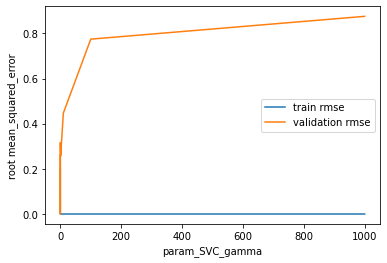

In [87]:
# Optimization by tuning the parameter Gamma:

train_errors = []
valid_errors = []
param_SVC_gamma = [0.00001, 0.0001, 0.001, 0.1, 1,10,100,1000]

for g in param_SVC_gamma:
    svc_rbf = SVC(kernel='rbf', C=1e4, gamma=g)
    y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, svc_rbf.predict(x_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_val, svc_rbf.predict(x_val))))
    

plt.xlabel('param_SVC_gamma')
plt.ylabel('root mean_squared_error')
plt.plot(param_SVC_gamma, train_errors, label="train rmse")
plt.plot(param_SVC_gamma, valid_errors, label="validation rmse")
plt.legend()

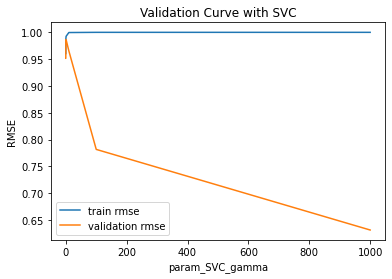

In [101]:
from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_SVC_gamma,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("param_SVC_gamma")
plt.ylabel("RMSE")
plt.plot(param_SVC_gamma , train_scores_mean, label="train rmse")
plt.plot(param_SVC_gamma , valid_scores_mean, label="validation rmse")

plt.legend()

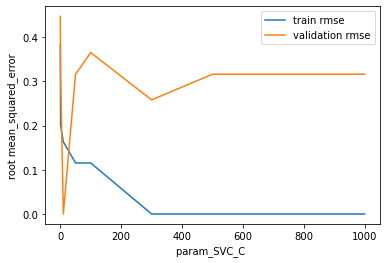

In [112]:
# Optimization by tuning the parameter C:
train_errors = []
valid_errors = []
param_SVC_C = [0.1,1, 10, 50, 100,300,500,1000]

for c in param_SVC_C:
    svc_rbf = SVC(kernel='rbf', C=c, gamma=0.1)
    y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, svc_rbf.predict(x_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_val, svc_rbf.predict(x_val))))
    

plt.xlabel('param_SVC_C ')
plt.ylabel('root mean_squared_error')
plt.plot(param_SVC_C, train_errors, label="train rmse")
plt.plot(param_SVC_C, valid_errors, label="validation rmse")
plt.legend()

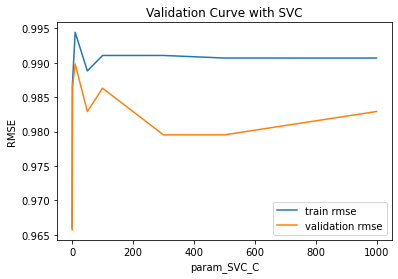

In [114]:
train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="C", param_range=param_SVC_C,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("param_SVC_C")
plt.ylabel("RMSE")
plt.plot(param_SVC_C, train_scores_mean, label="train rmse")
plt.plot(param_SVC_C, valid_scores_mean, label="validation rmse")

plt.legend()

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 50, 100,300,500,1000],
                         'gamma': [0.00001, 0.0001, 0.001, 0.1, 1,10,100,1000],'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.00

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 300, 500, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             verbose=2)

In [136]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [137]:
# Let C=10, gamma=0.1:

svc_rbf = SVC(kernel='rbf', C=10, gamma=0.1)
y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)
print("With rbf kernel，R2 score is:", r2_score(y_test, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))
print(confusion_matrix(y_test, y_rbf))
print(classification_report(y_test, y_rbf))


With rbf kernel，R2 score is: 0.9354375896700143 ,Mean squared error: 0.04 ,the Variance score: 0.94(best fit = 1)
[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [138]:
# b. Classification model for the IRIS dataset using decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
y_clf = clf.fit(x_train, y_train).predict(x_test)

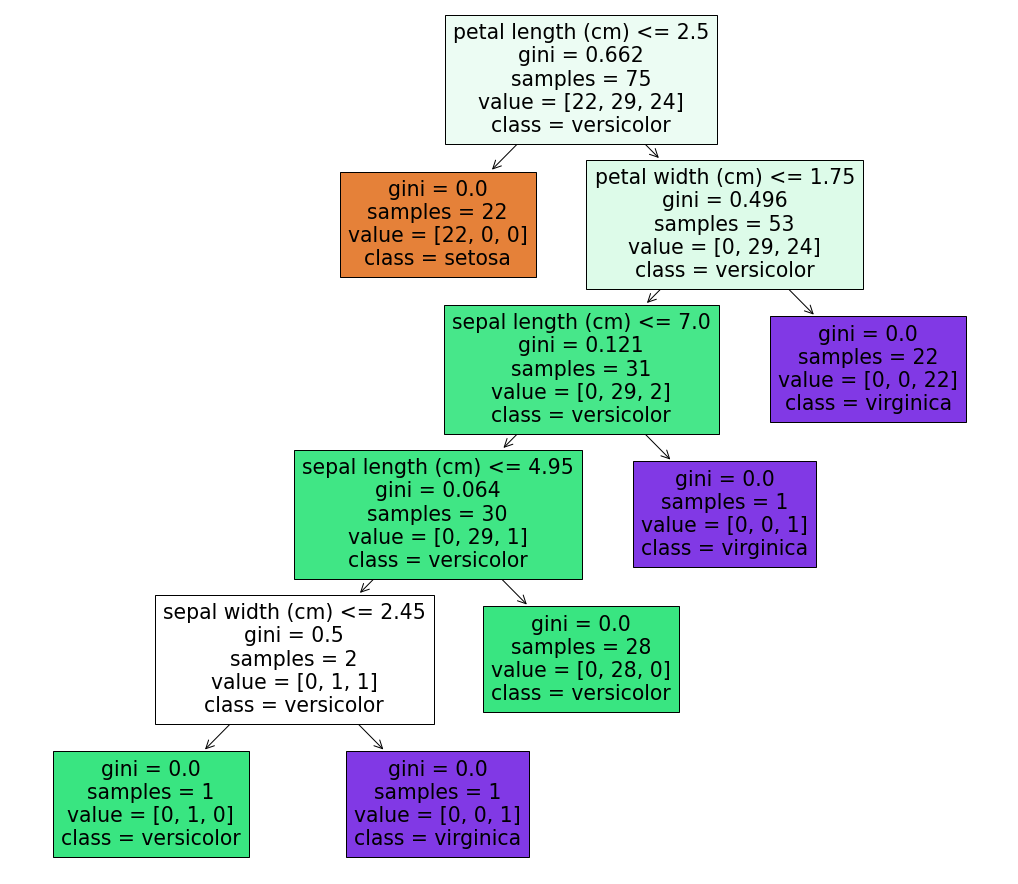

In [139]:
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [140]:
print("With Decision tree classification，R2 score is:", r2_score(y_test, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_clf))

With Decision tree classification，R2 score is: 0.9354375896700143 ,Mean squared error: 0.04 ,the Variance score: 0.94(best fit = 1)


In [146]:
print(confusion_matrix(y_test, y_clf))
print(classification_report(y_test, y_clf))

[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [169]:
# Optimization by tuning the parameter:
param_clf = {
        'criterion':['entropy','gini'],
        "max_depth":[2,3,4,5,6],
        "min_samples_split":[2,3,4,5,6],
        "min_samples_leaf":[2,3,4,5,6]
}
grid = GridSearchCV(clf,param_grid=param_clf,
                                     cv=10,verbose=1,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=2),
             n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [170]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [171]:
grid.best_score_

0.9607142857142857

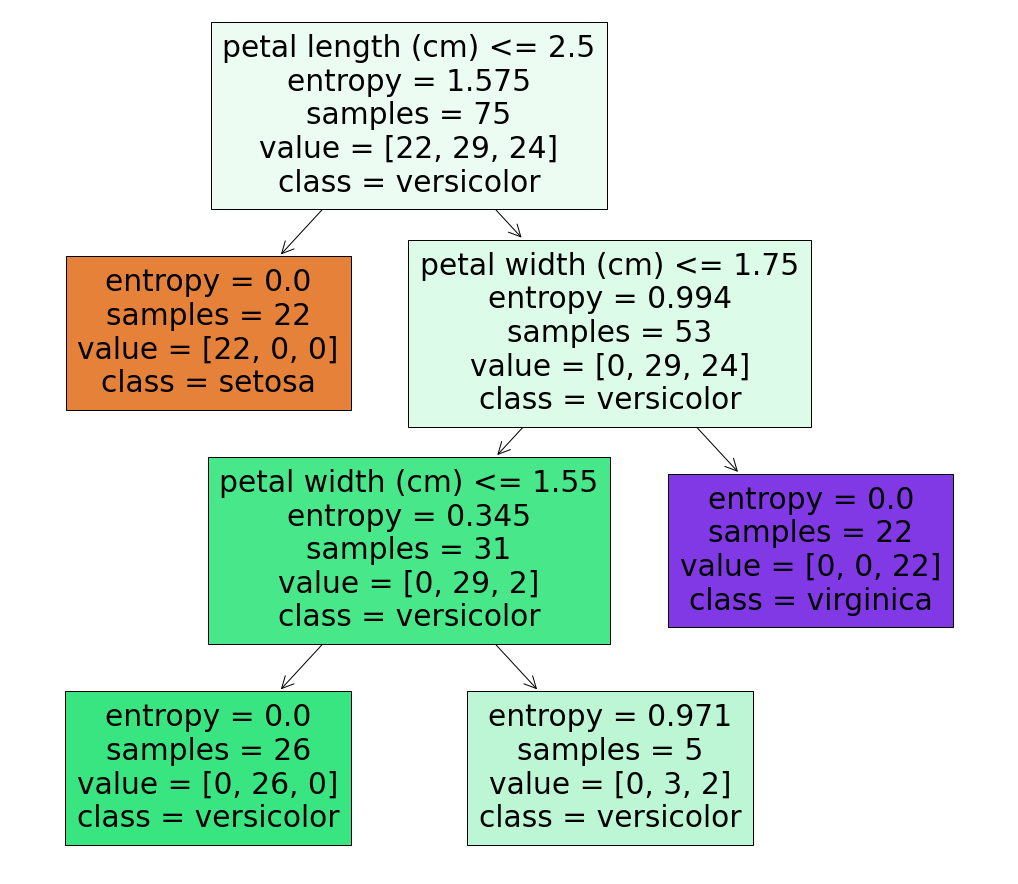

In [172]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=2,min_samples_split=2)
y_clf = clf.fit(x_train, y_train).predict(x_test)

fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [173]:
print("With Decision tree classification，R2 score is:", r2_score(y_test, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_clf))
print(confusion_matrix(y_test, y_clf))
print(classification_report(y_test, y_clf))


With Decision tree classification，R2 score is: 0.9354375896700143 ,Mean squared error: 0.04 ,the Variance score: 0.94(best fit = 1)
[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [201]:
# c. Classification model for the IRIS dataset using Artificial Neural Network (MLP)(use the sigmoid function as an activation)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,30,20),activation='logistic',solver='adam',max_iter=10000)
y_mlp = mlp.fit(x_train, y_train).predict(x_test)

In [202]:
print(confusion_matrix(y_test,y_mlp))
print(classification_report(y_test,y_mlp))
print("With ANN method，R2 score is:", r2_score(y_test, y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_test, y_mlp),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_mlp))

[[ 0 15  0]
 [ 0 14  0]
 [ 0 16  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.31      1.00      0.47        14
         2.0       0.00      0.00      0.00        16

    accuracy                           0.31        45
   macro avg       0.10      0.33      0.16        45
weighted avg       0.10      0.31      0.15        45

With ANN method，R2 score is: -0.0007173601147776321 ,Mean squared error: 0.69 ,the Variance score: -0.00(best fit = 1)
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: 

In [206]:
# Optimization by tuning the parameter:
param_MLP={
                    "hidden_layer_sizes": [(10,),(10,20),(10, 30)],
                     "solver": ['adam', 'sgd', 'lbfgs'],
                     "max_iter": [100],
                      "verbose": [True],
                      'activation': ["logistic", "relu", "Tanh"]
}

grid = GridSearchCV(mlp ,param_grid=param_MLP,n_jobs=-1,verbose=2,cv=10)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.47142857 0.39642857 0.94821429 0.4125     0.3875     0.975
 0.3875     0.3875     0.93392857 0.60178571 0.66071429 0.96071429
 0.82857143 0.82678571 0.975      0.90892857 0.8125     0.96071429
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(10, 30, 20),
                                     max_iter=10000),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'hidden_layer_sizes': [(10,), (10, 20), (10, 30)],
                         'max_iter': [100], 'solver': ['adam', 'sgd', 'lbfgs'],
                         'verbose': [True]},
             verbose=2)

In [207]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (10, 20),
 'max_iter': 100,
 'solver': 'lbfgs',
 'verbose': True}

In [208]:
grid.best_score_

0.975

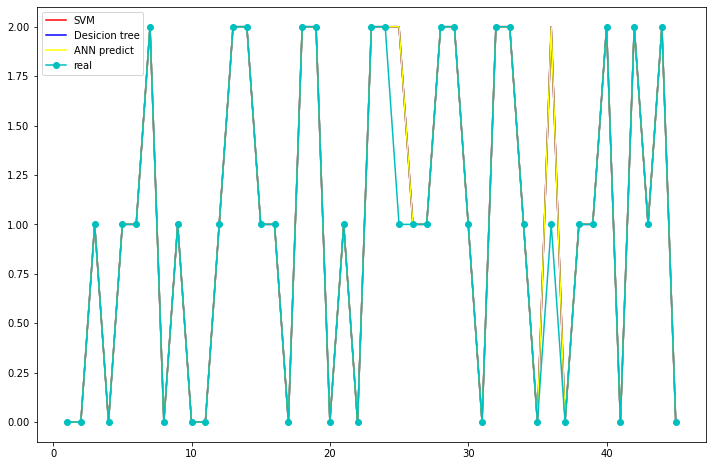

In [36]:
plt.figure(figsize=(12,8))

x_s = np.arange(1,len(x_test) + 1)

plt.plot(x_s, y_rbf,color='red', label="SVM")
plt.plot(x_s, y_clf, color='blue',label="Desicion tree")
plt.plot(x_s, y_mlp,color='yellow',label="ANN predict")
plt.plot(x_s, y_test, 'co-', label="real")
plt.legend()

In [37]:
cross_val_score(mlp, x_val, y_val, cv=8)

array([1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  ])

In [38]:
cross_val_score(svc_rbf, x_val, y_val, cv=8)

array([1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  ])

In [39]:
cross_val_score(clf, x_val, y_val, cv=8)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.75      , 0.66666667, 1.        ])

In [40]:
from sklearn.model_selection import validation_curve

clf = DecisionTreeClassifier(random_state=123)
y_clf = clf.fit(x_train, y_train).predict(x_test)


train_scores, valid_scores = validation_curve(RandomForestRegressor(n_estimators=100, random_state=1), X_train, y_train, "max_depth",
                                               param_range, scoring='neg_mean_squared_error', cv=5)
train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.plot(param_range, train_scores_mean, label="train rmse")
plt.plot(param_range, valid_scores_mean, label="validation rmse")

plt.legend()
plt.show()

NameError: name 'RandomForestRegressor' is not defined

In [1]:


train_errors = []
valid_errors = []
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,75,100]

for max_depth in param_range:
    random_forest = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=1)
    random_forest.fit(X_train, y_train)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_valid, random_forest.predict(X_valid))))
    

plt.xlabel('max_depth')
plt.ylabel('root mean_squared_error')
plt.plot(param_range, train_errors, label="train rmse")
plt.plot(param_range, valid_errors, label="validation rmse")
plt.legend()
plt.show()

NameError: name 'RandomForestRegressor' is not defined